### 1.1
What is the value of $\sqrt{2}^{\sqrt{2}^{{\sqrt{2}^{...}}}}$?

In [1]:
import math
result = math.sqrt(2)
for i in range(0,90):
    result = math.sqrt(2)**result
print(result)

1.999999999999999


### 3.1
You have a bag with two coins. One will come up heads 40% of the time, and the other will come up heads 60%. You pick a coin randomly, flip it and get a head. What is the probability it will be heads on the next flip?

In [2]:
import random
head = 0
firstFlipIsaHeadCtr = 0
secondFlipIsaHeadCtr = 0
for i in range(1,1000000):
    if random.random() < 0.5:
        probTails = 0.6
    else:
        probTails = 0.4
    coin = math.floor(random.random()/probTails)
    if coin > 0:
        firstFlipIsaHeadCtr += 1
        if math.floor(random.random()/probTails) > 0:
            secondFlipIsaHeadCtr += 1
print(secondFlipIsaHeadCtr/firstFlipIsaHeadCtr)

0.52005418375726


### 3.1 Object-oriented version
here we solve the same problem, but introducing objects to Python.

A simplistic approach to OO design is to identify the nouns in the problem description, and consider those be potential *classes*. A class is a template, sort of like a cookie cutter for stamping out identical objects, ready for use.

In this problem, we see **coins** and **bag** in the problem description. So let's make them into classes.

The *methods* of a class represent the actions we expect of the objects created from the class.

In [3]:
import numpy as np

class Coin(object): # we capitalize the names of classes
    # define a constructor, so that we can create instances (objects) of Coin:
    def __init__(self, probHeads):
        self.probHeads = probHeads
    
    def flipIsHead(self):
        return np.random.random() < self.probHeads

class CoinBag(object):
    def __init__(self):
        self.coins = []
    def addCoin(self, coin):
        self.coins.append(coin)
    def pickRandomCoin(self):
        return np.random.choice(self.coins)
    def nextNFlipsAreHeads(self, n):
        for i in range(n):
            if not flipIsHead(self):
                return Flase
        return True
    
cb = CoinBag()
cb.addCoin(Coin(0.6))
cb.addCoin(Coin(0.4))

firstFlipIsaHeadCtr = 0
secondFlipIsaHeadCtr = 0
for i in range(1,1000000):
    randomCoin = cb.pickRandomCoin()
    if randomCoin.flipIsHead():
        firstFlipIsaHeadCtr += 1
        if randomCoin.flipIsHead():
            secondFlipIsaHeadCtr += 1
print(secondFlipIsaHeadCtr/firstFlipIsaHeadCtr)

0.5204772254224309


### 3.1
In front of you is a jar of 1000 coins. One of the coins has two heads, and the rest are fair coins. You choose a coin at random, and flip it ten times, getting all heads. What is the probability it is one of the fair coins?

In [4]:
import numpy as np

class Coin(object): # we capitalize the names of classes
    # define a constructor, so that we can create instances (objects) of Coin:
    def __init__(self, probHeads):
        self.probHeads = probHeads    
    def flipIsHead(self):
        return np.random.random() < self.probHeads
    def nextNFlipsAreHeads(self, n):
        for i in range(n):
            if not self.flipIsHead():
                return False
        return True

class CoinBag(object):
    def __init__(self):
        self.coins = []
    def addCoin(self, coin):
        self.coins.append(coin)
    def pickRandomCoin(self):
        return np.random.choice(self.coins)

t = 100
cb = CoinBag()
cb.addCoin(Coin(1))
[cb.addCoin(Coin(0.5)) for n in range(999)]
numberFair = 0
for i in range(t):
    randomCoin = cb.pickRandomCoin()
    while not randomCoin.nextNFlipsAreHeads(10):
        randomCoin = cb.pickRandomCoin()
    if randomCoin.probHeads == 0.5:
        numberFair += 1
print(numberFair/t)

0.48


### Monty Hall Problem

You are a contestant on a game show. You have 3 doors in front of you. Behind two of the doors are goats. Unattractive goats. Behind the other door is a brand new Tesla. The game show host asks you to choose a door. After you do, he opens one of the remaining doors, and there stands a goat. The game show host asks you if you'd like to switch doors. What do you do?

In [5]:
import numpy as np
ctr = 0
t = 10000
for i in range(t):
    door = [1,2,3]
    prize = np.random.choice(door)
    choose = np.random.choice(door)
    door.remove(choose)
    hostopen = np.random.choice(list(set(door).difference(set([prize]))))
    door.remove(hostopen) # change the door
    if door[0] == prize:
        ctr += 1
print(ctr/t) # prob of choosing correct door if switch

0.6596


### 3.5
Starting at one vertex of a cube, and moving randomly from vertex to adjacent vertices, what is the expected number of moves until you reach the  vertex opposite from your starting point?

In [6]:
import random
s = 0
t = 100000
for i in range(0,t):
    state = 0
    c = 0
    while state != 3:
        x = random.random()
        if state == 0:
            state = 1
        elif state == 1:
            if x < 1/3:
                state = 0
            else:
                state = 2
        else:
            if x < 2/3:
                state = 1
            else:
                state = 3
        c+=1
    s += c
print(s/t)

9.98342


### 3.8
You have a spinner that generates random numbers that are uniform between 0 and 1. You sum the spins until the sum is greater than one. What is the expected number of spins?

In [7]:
# import random

# AllCtr = 0
# t = 1000
# for i in range(0,t):
#     s = 0
#     Ctr = 0
#     while s <= 1:
#         n = random.random()
#         s+=n
#         Ctr += 1
#     AllCtr += Ctr
# print(AllCtr/t)
import numpy as np

class Spinner(object):
    def __init__(self):
        self.total = 0
        self.spinCtr = 0
    def spin(self):
        self.total += np.random.random()
        self.spinCtr += 1
    def reset(self):
        self.total = 0
        self.spinCtr = 0
    def spinUntilGreaterThanOneAndReset(self):
        self.reset()
        while self.total < 1:
            self.spin()
        return self.spinCtr

ctr = 0
t = 100000
spinner = Spinner()
# for i in range(t):
#     ctr += spinner.spinUntilGreaterThanOne()
#     spinner.reset()
# print(ctr/t)

trials = [spinner.spinUntilGreaterThanOneAndReset() for n in range(t)]

(array([  4.99500000e-01,   3.33340000e-01,   1.25870000e-01,
          3.28800000e-02,   6.84000000e-03,   1.35000000e-03,
          1.80000000e-04,   4.00000000e-05]),
 array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 8 Patch objects>)

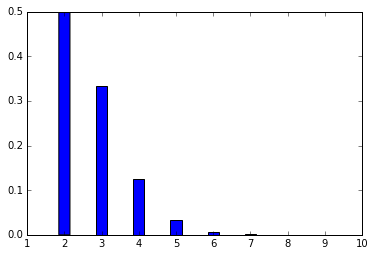

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

numBins = np.max(trials) - np.min(trials) + 1
plt.hist(trials, bins=numBins, normed=True, align='left',rwidth=0.3, range=(2, 2+numBins))

### 4.4
You have a basket of $n$ assets. The asset returns are multivariate normal with zero mean. Correlation between any pair of assets is 1/2. What is the probability that $k$ of the assets will have positive return?

In [9]:
import numpy as np
dim = 1000
k = 100
t = 1000
ctr = 0
for i in range(0,t):    
    CovarianceMatrix = np.ones((dim,dim))*.5
    np.fill_diagonal(CovarianceMatrix, 1)
    L = np.tril(CovarianceMatrix)
    UncorRets = np.random.standard_normal(dim)
    CorRets = np.dot(L, UncorRets)
    if k == (CorRets > 0).sum():
        ctr += 1
print(ctr/t)

0.001


### 3.10
A stick is broken randomly into 3 pieces. What is the probability of the pieces being able to form a triangle?

In [10]:
import random

t = 100000
ctr = 0
for i in range(0,t):
    first = random.random()
    second = random.uniform(0,1-first)
    left = 1-first-second
    if first > second and first > left:
        if second + left > first:
            ctr+=1
    elif second > first and second > left:
        if first + left > second:
            ctr+=1
    else:
        if first + second > left:
            ctr+=1
print(ctr/t)

0.19517


### 3.11
A stick is broken randomly into two pieces. The larger piece is then broken randomly into two pieces. What is the probability of the pieces being able to form a triangle?

In [11]:
import random

t = 100000
ctr = 0
for i in range(0,t):
    first = random.random()
    left = 1 - first
    if first > left:
        second = random.uniform(0,first)
        last = first-second
    else:
        second = random.uniform(0,left)
        last = left-second
    if first > second and first > last:
        if second + last > first:
            ctr+=1
    elif second > first and second > last:
        if first + last > second:
            ctr+=1
    else:
        if first + second > last:
            ctr+=1
print(ctr/t)

0.20102


### 5.10
Suppose there are 36 students in the QFRM program, each assigned a unique integer from 1 to 36. Thirty-six quarters are laid out on a table in a row, heads up. Each student goes to the table, and if they are assigned the number $n$, they turn over the $n$th coin, the $2n$th coin, and so on. So, for example, the student who is assigned 15 will turn over the 15th and 30th coins. When everyone is done, how many tails are showing?

In [12]:
import random

coin = [1]*36
students = list(range(1,37))
ctr = 0
for s in students:
    while s <= 36:
        if coin[s-1] == 1:
            coin[s-1] = 0
        else:
            coin[s-1] = 1
        s += s
ctr += coin.count(0)
print(ctr)

24
